# Plotting Peta Kasus COVID19 di Indonesia

Sumber Data: https://bnpb-inacovid19.hub.arcgis.com/datasets/data-harian-kasus-per-provinsi-covid-19-indonesia/geoservice

Struktur Data:
1. attributes
 * FID: ID Unik
 * Kode_Provi: Kode Provinsi
 * Provinsi: Nama Provinsi
 * Kasus_Posi: Jumlah Kasus Positiv Covid19
 * Kasus_Semb: Jumlah Kasus Sembuh Covid19
 * Kasus_Meni: Jumlah Kasus Meninggal Covid19
2. geometry
 * x: Latitude
 * y: Longitude

# Import Library

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

response = requests.get('https://services5.arcgis.com/VS6HdKS0VfIhv8Ct/arcgis/rest/services/COVID19_Indonesia_per_Provinsi/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')
todos = json.loads(response.text)

In [5]:
# print(todos)

{'error': {'code': 499, 'message': 'Token Required', 'messageCode': 'SB_0005', 'details': ['Token Required']}}


In [7]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, indent=4)
    print(text)

jprint(response.json())

{
    "error": {
        "code": 499,
        "message": "Token Required",
        "messageCode": "SB_0005",
        "details": [
            "Token Required"
        ]
    }
}


In [4]:
features = response.json()['features']
data = []
for i in features:
    row = []
    row.append(i['attributes']['FID'])
    row.append(i['attributes']['Kode_Provi'])
    row.append(i['attributes']['Provinsi'])
    row.append(i['attributes']['Kasus_Posi'])
    row.append(i['attributes']['Kasus_Semb'])
    row.append(i['attributes']['Kasus_Meni'])
    row.append(i['geometry']['x'])
    row.append(i['geometry']['y'])
    data.append(row)
hasil = pd.DataFrame(data, columns=['fid', 'kode_prov', 'nama_prov', 'positif', 'sembuh', 'meninggal', 'lat', 'long'])
    
hasil

KeyError: 'features'

In [6]:
hasil.info()

NameError: name 'hasil' is not defined

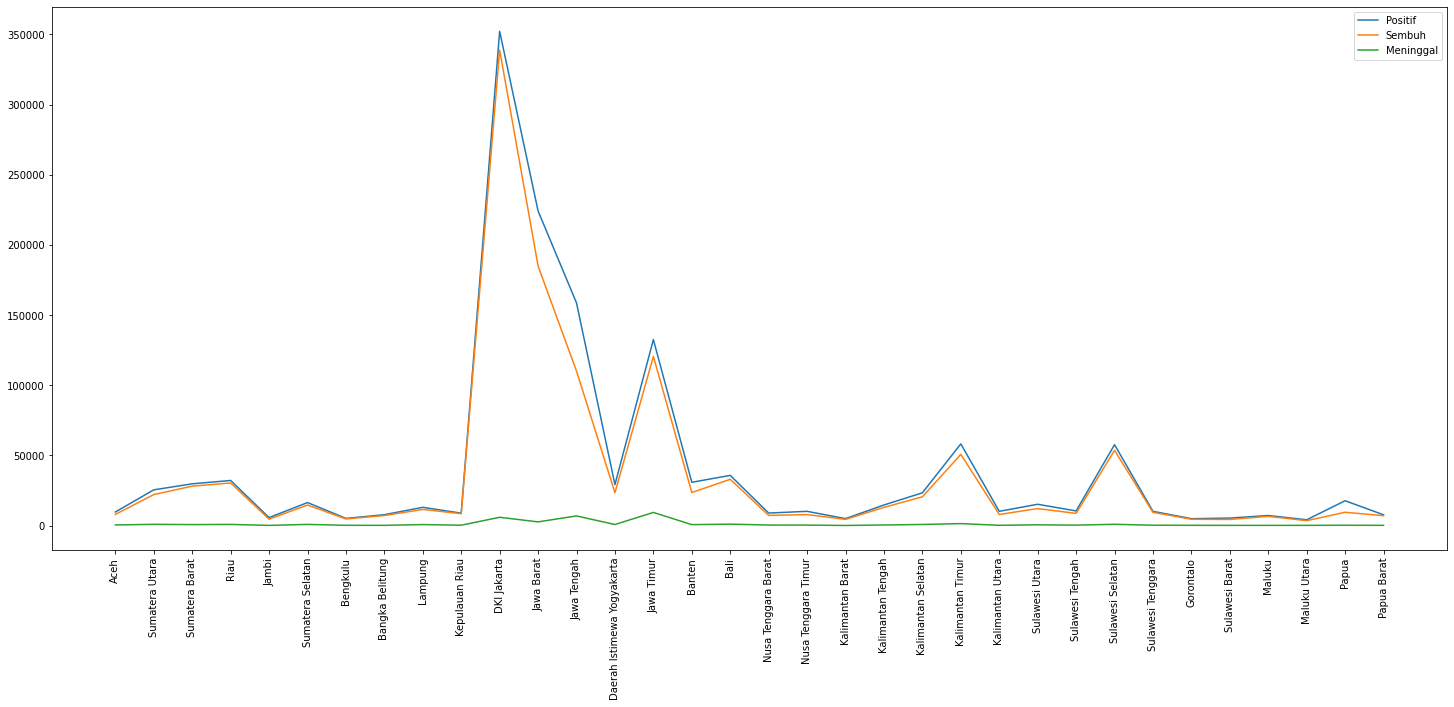

In [ ]:
plt.figure(figsize=(25, 10))
plt.plot(hasil['nama_prov'][:34], hasil['positif'][:34], label='Positif')
plt.plot(hasil['nama_prov'][:34], hasil['sembuh'][:34], label='Sembuh')
plt.plot(hasil['nama_prov'][:34], hasil['meninggal'][:34], label='Meninggal')
plt.xticks(rotation=90)
plt.legend()
plt.show()

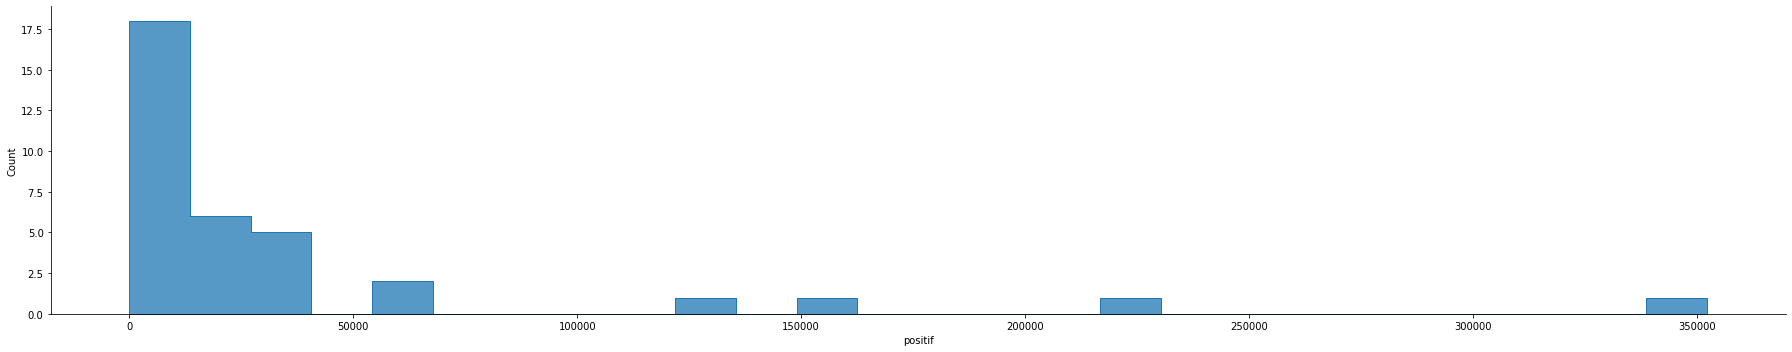

In [ ]:
sns.displot(hasil, x='positif', element='step', height=5, aspect=5)
plt.show()

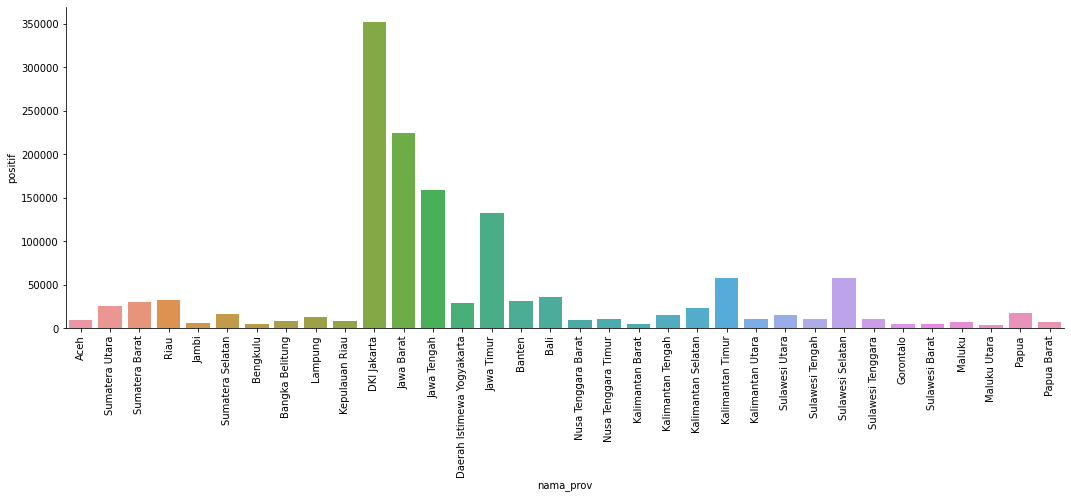

In [ ]:
sns.catplot(x='nama_prov', y='positif', kind='bar', data=hasil[:34], height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

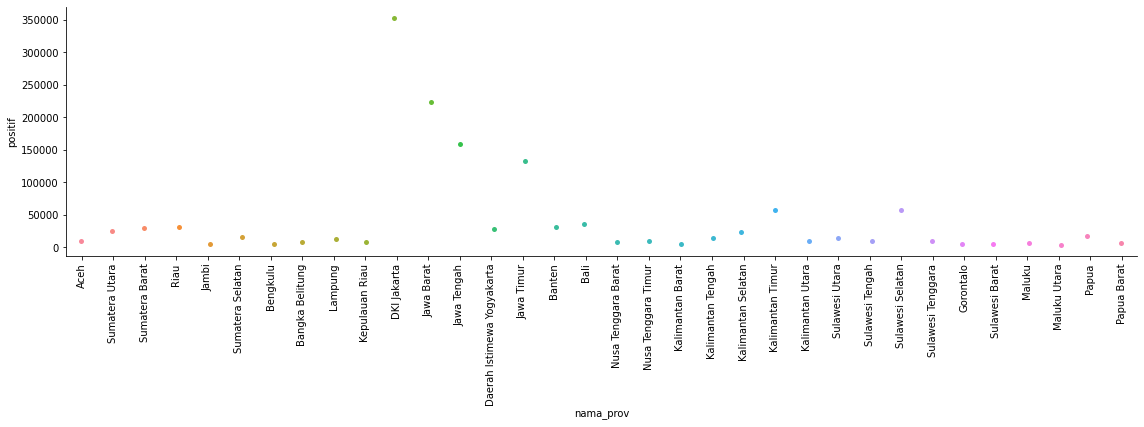

In [ ]:
sns.catplot(x='nama_prov', y='positif', data=hasil[:34], height=4, aspect=4)
plt.xticks(rotation=90)
plt.show()

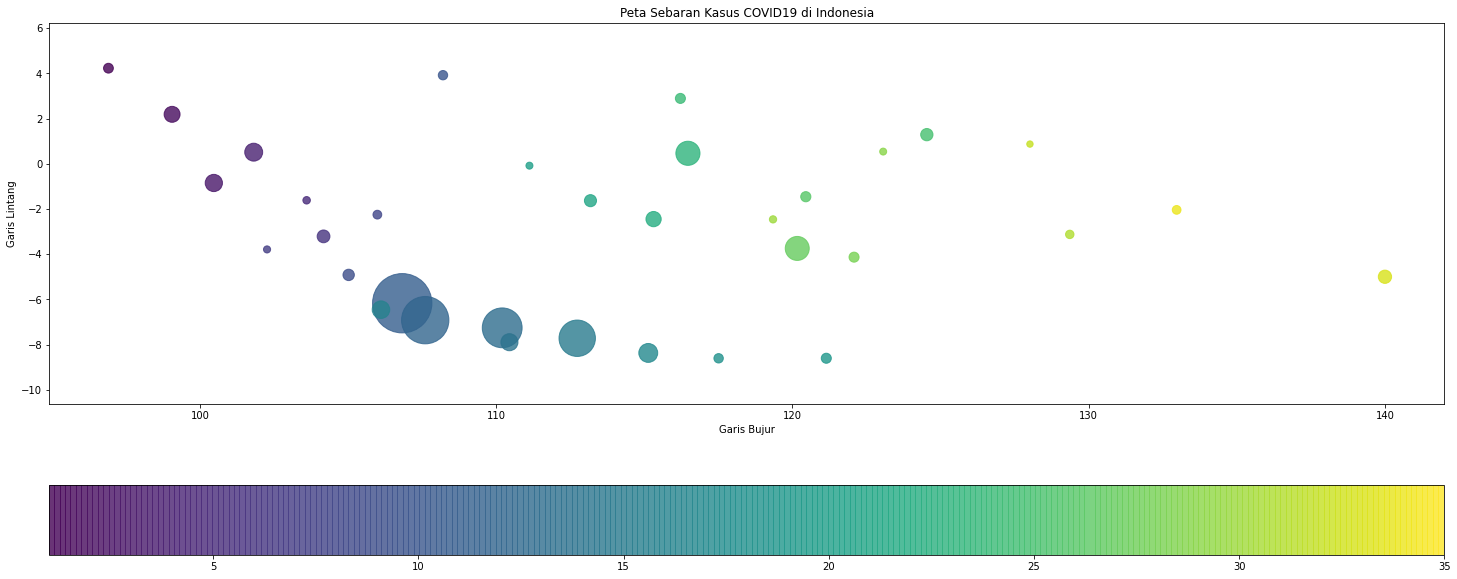

In [ ]:
x = hasil['lat']
y = hasil['long']
size = hasil['positif'] / 100
color = hasil['fid']

fig, ax = plt.subplots(figsize=(25,10))
sc = plt.scatter(x, y, s=size, c=color, alpha=.8)
plt.colorbar(sc, orientation="horizontal")
plt.title('Peta Sebaran Kasus COVID19 di Indonesia')
plt.xlabel('Garis Bujur')
plt.ylabel('Garis Lintang')
plt.xlim([96.90952274776174-2, 140.0000000003746+2])
plt.ylim([-8.606652084111358-2, 4.225081892093782+2])
plt.show()

In [8]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ASUS\anaconda3\envs\time_series\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ASUS\\AppData\\Local\\Temp\\pip-install-30p6f61y\\fiona_2bcf5d3bfb014a2299dd03b09fc1c3b5\\setup.py'"'"'; __file__='"'"'C:\\Users\\ASUS\\AppData\\Local\\Temp\\pip-install-30p6f61y\\fiona_2bcf5d3bfb014a2299dd03b09fc1c3b5\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\ASUS\AppData\Local\Temp\pip-pip-egg-info-975abmeg'
       cwd: C:\Users\ASUS\AppData\Local\Temp\pip-install-30p6f61y\fiona_2bcf5d3bfb014a2299dd03b09fc1c3b5\
  Complete output (1 lines):
  A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environmen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BBox = ((hasil['lat'].min(), hasil['lat'].max(), hasil['long'].min(),   hasil['long'].max()))
BBox

(96.90952274776174, 140.0000000003746, -8.606652084111358, 4.225081892093782)

In [9]:
import geopandas as gpd

map_df = gpd.read_file("Indonesia.shx")


kordinat = hasil[['lat', 'long']]
merged = map_df.join(kordinat)

x = hasil['lat']
y = hasil['long']
size = hasil['positif'] / 100
color = hasil['fid']

# fig, ax = plt.subplots(figsize=(25,10))
ax = map_df.plot(figsize=(20,10), cmap='YlGn')
sc = plt.scatter(x, y, s=size, c=color, alpha=.5, cmap='hot')
plt.colorbar(sc, orientation="horizontal")
plt.title('Peta Sebaran Kasus COVID19 di Indonesia')
plt.xlabel('Garis Bujur')
plt.ylabel('Garis Lintang')
plt.xlim([96.90952274776174-2, 140.0000000003746+1])
plt.ylim([-8.606652084111358-3, 4.225081892093782+2])
plt.show()

ModuleNotFoundError: No module named 'geopandas'